Introduction 

One common fate we all share is death, regardless of our skin colour, social status, income, or the amount of Bitcoins or Tesla stock we own. Although life will end for everyone someday, the range in the life expectancy varies drastically. Why is this? Why is there such a significant difference although we all share 99.9% of the same DNA? By figuring out possible factors influencing life expectancy, we can explore ways to possibly extend our time on this Earth. This will be outside of the scope of this project where we will focus primarily on finding a potential relationship between one of the variables (i.e. health related factors) with life expectancy. We will then use that relationship to make predictions of life expectancies based on that specific factor. We will use the income composition of resources (ICOR) as the independent variable in this project. ICOR refers to how productive the resources are used. 

We will be working with a cross-sectional dataset measuring the life expectancy and various health aspects for all countries. The data source is from The Global Health Observatory (GHO) under World Health Organization (WHO).  The objective of this project is to determine the relationship between the life expectancy and the ICOR value of the country. Therefore, the first step would be to extract only the data columns and rows which are required for this analysis. 

In [2]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
# Import raw dataset

raw_data = pd.read_csv("Data_Life Expectancy.csv")
raw_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Standardize column headers.
# We standardize all column headers to the same format. First we remove empty spaces at the beginning and end of the string. Then, we 
# capitlize the first letter of each word. First, we transform the column headers to string format. 

raw_data.columns = raw_data.columns.astype("str")
raw_data.columns = raw_data.columns.str.strip().str.title()
raw_data.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'Bmi', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'Hiv/Aids', 'Gdp', 'Population', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

In [5]:
# Filter and extract. 
# We will examine the figures for life expectancy and income composition of resources for every 
# country in 2015 (i.e. the most recent year in the dataset). 

# Extracting rows which are in 2015. 
data = raw_data[raw_data["Year"] == 2015]

# Keep columns country, life expectancy and income composition of resources and drop the rest. 
col_list = ["Country", "Life Expectancy", "Income Composition Of Resources"]
data = data[col_list]

data.head()

,Country,Life Expectancy,Income Composition Of Resources
0,Afghanistan,65.0,0.479
16,Albania,77.8,0.762
32,Algeria,75.6,0.743
48,Angola,52.4,0.531
64,Antigua and Barbuda,76.4,0.784


In [6]:
# General overview of the dataset.
# In this step, we aim to gain a better understanding of key characteristics and properties of this dataset. In addition to that, we will
# identify any missing or NULL values. 

# Check the structure of our dataset and for any NULL values. 
data.info()
print()
print(f"The shape of the dataset is given by {data.shape}.")

# Check summary statistics for any discrepancies. Out of range figures are usually an indication of invalid or missing values in the dataset. 
data.describe()

# From info(), 173 out of 183 ICOR values were non NULL values. Therefore, there are 10 NULL values. 
# No indication of invalid or missing values from describe(). 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 2922
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Life Expectancy                  183 non-null    float64
 2   Income Composition Of Resources  173 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.7+ KB

The shape of the dataset is given by (183, 3).


,Life Expectancy,Income Composition Of Resources
count,183.000000,173.000000
mean,71.616940,0.691740
std,8.123706,0.153412
min,51.000000,0.347000
25%,65.750000,0.565000
50%,73.900000,0.723000
75%,76.950000,0.798000
max,88.000000,0.948000


In [7]:
# Handling NULL values. 
# There are many methods to handle missing data depending on the case. Since we only have a small proportion of missing values, we will
# use the easiest method, which is to just drop the rows consisting of missing values. 

data.dropna(axis = 'index', how = 'any', inplace = True)
data.shape

# We can see we only have 173 rows, as expected. 

(173, 3)

In [8]:
# Re-indexing the DataFrame. 
# Assign new index sequence in order. 

data.reset_index(drop = True, inplace = True)
data.head()

,Country,Life Expectancy,Income Composition Of Resources
0,Afghanistan,65.0,0.479
1,Albania,77.8,0.762
2,Algeria,75.6,0.743
3,Angola,52.4,0.531
4,Antigua and Barbuda,76.4,0.784


In [9]:
data.sort_values("Income Composition Of Resources", ascending = False)

# Immediately, we can see a general pattern. The countries with the highest ICOR values tend to have life expectancies closer to the 
# maximum, whereas for countries with the lowest ICOR values, the life expectancy is significantly lower. 

,Country,Life Expectancy,Income Composition Of Resources
115,Norway,81.8,0.948
150,Switzerland,83.4,0.938
7,Australia,82.8,0.937
58,Germany,81.0,0.924
138,Singapore,83.1,0.924
...,...,...,...
26,Burundi,59.6,0.406
25,Burkina Faso,59.9,0.399
32,Chad,53.1,0.394
113,Niger,61.8,0.351


Text(0, 0.5, 'Life Expectancy')

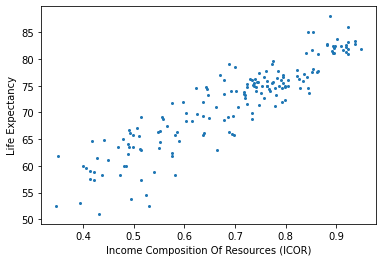

In [10]:
# Scatterplot

feature_cols = ["Income Composition Of Resources"]
X = data[feature_cols]
y = data["Life Expectancy"]
plt.scatter(X, y, s = 4)
plt.xlabel("Income Composition Of Resources (ICOR)")
plt.ylabel("Life Expectancy")

# We can see a clear correlation between these two variables. 


In [11]:
# Linear regression.
# Linear regression is perfectly suitable for the purposes of this project. We are dealing with cross sectional data and there seems to be 
# some sort of relationship between the two variables.  Predictions can be made on llife expectancy using ICOR can be made using the line
# of best fit. 

# Fit the model.
model = LinearRegression().fit(X, y)

# Calculate the regression coefficient and the y-intercept value. 
m = model.coef_[0]
c = model.intercept_

# print(f"Linear regression equation: y = {round(m[0], 2)} x + {round(c[0], 2)}.")

print(f"Linear regression equation: y = {round(m, 2)} x + {round(c, 2)}.")

# Note: The expected regression coefficient is between -1 and 1. However, for the purposes of making predicitons, we can proceed with 
# this value. 

Linear regression equation: y = 46.92 x + 39.25.


In [12]:
# Predictions of life expectancy values using ICOR based on our linear regression model. 

# All three of the following methods yields the same results for our usage.  
# X_new = pd.DataFrame(data["Income Composition Of Resources"])
# X_new = data["Income Composition Of Resources"].values.reshape(-1, 1)
X_new = data.loc[:, ["Income Composition Of Resources"]]

predictions = model.predict(X_new)
X_new


,Income Composition Of Resources
0,0.479
1,0.762
2,0.743
3,0.531
4,0.784
...,...
168,0.769
169,0.678
170,0.499
171,0.576


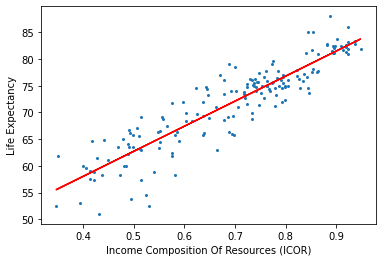

In [13]:
# Plotting the linear regression line. 
# By using the linear regression line and equation, we can make forecasts. 

plt.scatter(X, y,  s = 4)
plt.xlabel("Income Composition Of Resources (ICOR)")
plt.ylabel("Life Expectancy")
plt.plot(X_new, predictions, color = "red")

In [14]:
# Quality of the regression model
# R-squared value, residual plot, qq-plot
# R-squared value
# Also known as the coefficient of determinant is a goodness of fit measure for the regression model. The value is a ratio and is calculated
# by dividing the variance explained by the model by the total variance. 

model.score(X_new, y)
# This translates to around 82% of the variation in life expectancy is accounted for by its regression on ICOR. 

0.8233091748688696

Text(0.5, 1.0, 'Residual plot')

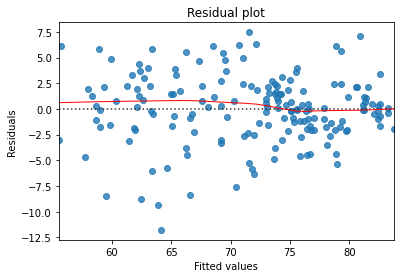

In [15]:
# Residual plot
# In residual plots, the fitted values are plotted against the residuals. The residuals are calculated by subtracting the predicted value 
# from the actual value. 

sns.residplot(x = predictions, y = y, data = data,lowess = True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title('Residual plot')

# The pattern is relatively random and spaced around the horizontal axis, therefore, indicating our model is appropriate for our data. 

Text(0.5, 1.0, 'Normal Q-Q Plot')

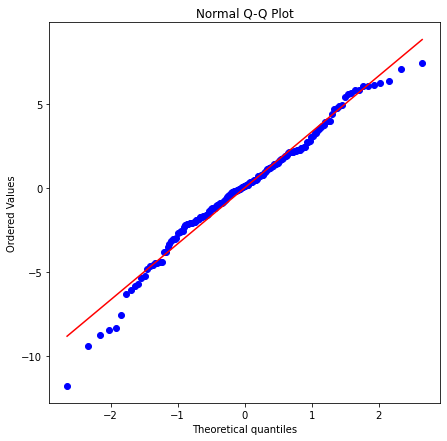

In [16]:
# QQ-plot
# Checks for the normality of the residuals. Compares the quantiles in the dataset with the theoretical quantiles of a dataset with 
# normal distribution. 

residuals = y - predictions

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

#  QQ-plot indicates there is a left skew in our data. 

C:\Users\Leon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted value')

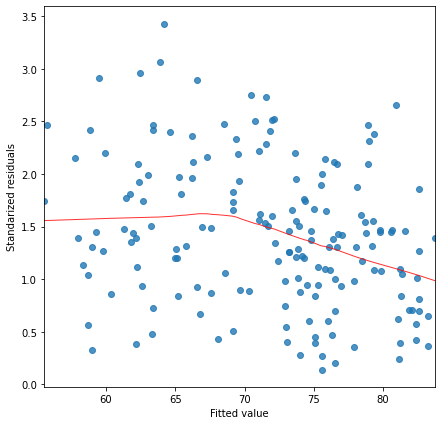

In [17]:
# Scale location plot
# Homoscedacity: contant variance. 
# Show whether the residuals are spread equally along the residuals of the predictors. The plot is given by plotting the fitted values with 
# the square root of the standardized residuals. 

model_norm_res_abs_sqrt = np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(predictions, model_norm_res_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

# The residuals appear to be randomly spread around the red line, indicating the model is a good fit. 

Conclusion

The diagnostic plots are satisfactory and we conclude our project. There appears to be a strong relationship between ICOR and life expectancy. Based only on this simple linear regresson model, countries that are able to utilize their resources more productively have a population with higher life expectancies. 

Some issues with this project were identified. Firstly, the regression coefficient lied outside of the expected range of -1 and 1. In multiple linear regression, this could be explained by potential strong multicollinearity between the independent variables, however, for simple linear regression, the source of the issue is yet to be identified. Since predictions were able to be made, the model will suffice. Slight issues were also identified in the diagnostic plots, depending on the strictness of evaluation. The residual plots displayed less variance in the higher values and for the qq-plot, the values were under the line of the theoretical for the tails, indicating a left-skew in our data. Lastly, the scale-location plot line experiences a dip around 70 when ideally, it should be horizontal. Improvements in the treatment of our data could potentially be made if the model was to be reassessed. 

It is vital to investigate the methods and factors used to calculate the ICOR value. This could give us a deeper insight in the various possible indicators which contribute to the life expectancy of the population. Additionally, in reality, many factors contribute to someone's life expectancy, such as access to healthcare, the GDP of the country, infant mortality rates etc. A more sophisticated linear regression model which takes into account multiple variables can significantly increase the quaity of the model and make more accurate predictions. 